In [62]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("viktor-cikojevic/three_d_seg")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })


In [63]:
df.head()   

,summary,config,name
0,"{'epoch': 0, '_runtime': 3846.764892816544, 't...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x2-bs32-llr-3....
1,"{'epoch': 0, '_wandb': {'runtime': 4463}, 'cru...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x2-bs32-llr-3....
2,"{'surface_dice': 0.8761921525001526, '_runtime...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x3-bs32-llr-3....
3,"{'_runtime': 4401.484475135803, 'trainer/globa...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x2-bs32-llr-3....
4,"{'_step': 1472, 'f1_score': 0.9103538393974304...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x16-bs32-llr-3...


In [64]:
group_names = []
for i in range(len(df)):
    try:
        group_name = df.config.iloc[i]['group_name']
        group_names.append(group_name)
    except:
        group_names.append('None')
    
df['group_name'] = group_names
df

,summary,config,name,group_name
0,"{'epoch': 0, '_runtime': 3846.764892816544, 't...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x2-bs32-llr-3....,labelling_k2
1,"{'epoch': 0, '_wandb': {'runtime': 4463}, 'cru...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x2-bs32-llr-3....,labelling_k2
2,"{'surface_dice': 0.8761921525001526, '_runtime...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x3-bs32-llr-3....,smp_unet_r50_scan_n_channels
3,"{'_runtime': 4401.484475135803, 'trainer/globa...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x2-bs32-llr-3....,smp_unet_r50_scan_n_channels
4,"{'_step': 1472, 'f1_score': 0.9103538393974304...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x16-bs32-llr-3...,smp_unet_r50_scan_n_channels
...,...,...,...,...
79,"{'threshold': 0.20000000298023224, 'epoch': 0,...","{'loss': [{'type': 'BCELoss', 'weight': 0.41},...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-2....,smp_unet_r50_hyptun
80,"{'_wandb': {'runtime': 9970}, 'crude_f1': 0, '...","{'loss': [{'type': 'BCELoss', 'weight': 0.6100...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....,smp_unet_r50_hyptun
81,"{'_step': 406, '_runtime': 2235.7720935344696,...","{'loss': [{'type': 'BCELoss', 'weight': 0.51},...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-2....,smp_unet_r50_hyptun
82,"{'_wandb': {'runtime': 3706}, '_timestamp': 17...","{'loss': [{'type': 'BCELoss', 'weight': 0.01},...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....,smp_unet_r50_hyptun


In [65]:
df = df[df['group_name'] == 'smp_unet_r18_hyptun']
df

,summary,config,name,group_name
25,"{'_wandb': {'runtime': 476}, '_runtime': 475.4...","{'loss': [{'type': 'BCELoss', 'weight': 0.11},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_r18_hyptun
26,"{'train_loss': 0.045184116810560226, 'trainer/...","{'loss': [{'type': 'BCELoss', 'weight': 0.01},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_r18_hyptun
27,"{'epoch': 0, '_runtime': 1910.0058007240295, '...","{'loss': [{'type': 'BCELoss', 'weight': 0.21},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_r18_hyptun
28,"{'crude_f1': 0, 'crude_val_loss': 0, 'trainer/...","{'loss': [{'type': 'BCELoss', 'weight': 0.3100...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_r18_hyptun
29,"{'threshold': 0.019999999552965164, 'epoch': 0...","{'loss': [{'type': 'BCELoss', 'weight': 1.01},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_r18_hyptun
30,"{'_wandb': {'runtime': 1887}, 'f1_score': 0.91...","{'loss': [{'type': 'BCELoss', 'weight': 0.7100...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_r18_hyptun
31,"{'_timestamp': 1703662858.8631015, 'train_loss...","{'loss': [{'type': 'BCELoss', 'weight': 0.41},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_r18_hyptun
32,"{'_wandb': {'runtime': 1890}, 'crude_f1': 0, '...","{'loss': [{'type': 'BCELoss', 'weight': 0.11},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_r18_hyptun
33,"{'_wandb': {'runtime': 1884}, 'crude_val_loss'...","{'loss': [{'type': 'BCELoss', 'weight': 0.01},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_r18_hyptun
34,"{'_wandb': {'runtime': 1890}, '_runtime': 1890...","{'loss': [{'type': 'BCELoss', 'weight': 0.11},...",SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,smp_unet_r18_hyptun


In [66]:
df.config.iloc[0]

{'loss': [{'type': 'BCELoss', 'weight': 0.11},
  {'type': 'MccLoss', 'weight': 0.01},
  {'type': 'DiceLoss', 'kwargs': {'smooth': 0.0001}, 'weight': 0.21},
  {'type': 'FocalLoss', 'kwargs': {'gamma': 2}, 'weight': 0.21}],
 'task': {'kwargs': {'ema_momentum': 0.00025,
   'eval_threshold': 0.2,
   'compute_crude_metrics': False}},
 'model': {'type': 'SMPModel',
  'kwargs': {'classes': 1,
   'version': 'Unet',
   'in_channels': 1,
   'encoder_name': 'resnet18',
   'encoder_weights': 'imagenet'}},
 'dataset': {'kwargs': {'load_ann': True,
   'crop_size': 512,
   'to_float32': True,
   'channel_end': None,
   'seg_fill_val': 0,
   'channel_start': 0,
   'crop_size_range': [400, 600],
   'n_take_channels': 1,
   'output_crop_size': None,
   'sample_with_mask': False,
   'p_crop_size_noise': 0.25,
   'reduce_zero_label': False,
   'assert_label_exists': True,
   'crop_location_noise': 50,
   'p_crop_size_keep_ar': 0.5,
   'normalisation_kwargs': {'std': 0.235,
    'mean': 0.5,
    'normalisat

In [67]:
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    if not isinstance(d, (dict, list)):
        # Return immediately if d is neither a dictionary nor a list
        return {parent_key: d}

    for k, v in d.items() if isinstance(d, dict) else enumerate(d):
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                items.extend(flatten_dict(item, f"{new_key}{sep}{i}", sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)


In [68]:
flat_configs = []
# loop over rows
for indx_row, row in df.iterrows():
    # Flatten the config   
    config = row['config']
    flat_config = flatten_dict(config)
    flat_configs.append(flat_config)

In [69]:
df = pd.DataFrame(flat_configs)
df.head()

,loss_0_type,loss_0_weight,loss_1_type,loss_1_weight,loss_2_type,loss_2_kwargs_smooth,loss_2_weight,loss_3_type,loss_3_kwargs_gamma,loss_3_weight,...,train_folders_0,batch_transform_kwargs_mixup_prob,batch_transform_kwargs_alpha_mixup,batch_transform_kwargs_cutmix_prob,batch_transform_kwargs_alpha_cutmix,experiment_name,quit_immediately,best_surface_dice,val_check_interval,apparent_batch_size
0,BCELoss,0.11,MccLoss,0.01,DiceLoss,0.0001,0.21,FocalLoss,2,0.21,...,kidney_1_dense,0.01,0.4,0.31,0.4,SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,False,0.349254,2500,32
1,BCELoss,0.01,MccLoss,0.21,DiceLoss,0.0001,0.61,FocalLoss,2,0.11,...,kidney_1_dense,0.31,0.4,0.41,0.4,SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,False,0.865687,2500,32
2,BCELoss,0.21,MccLoss,0.11,DiceLoss,0.0001,0.31,FocalLoss,2,0.31,...,kidney_1_dense,0.11,0.4,0.51,0.4,SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,False,0.865688,2500,32
3,BCELoss,0.31,MccLoss,0.91,DiceLoss,0.0001,0.11,FocalLoss,2,0.61,...,kidney_1_dense,0.11,0.4,0.21,0.4,SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,False,0.881460,2500,32
4,BCELoss,1.01,MccLoss,0.51,DiceLoss,0.0001,0.41,FocalLoss,2,0.11,...,kidney_1_dense,0.01,0.4,0.11,0.4,SMP(Unet_resnet18_imagenet)-c512x1-bs32-llr-3....,False,0.880982,2500,32


# Relative weights

In [70]:
df['loss_0_weight_rel'] = df['loss_0_weight'] # / (df['loss_0_weight'] + df['loss_1_weight'] + df['loss_2_weight'] + df['loss_3_weight'])
df['loss_1_weight_rel'] = df['loss_1_weight'] # / (df['loss_0_weight'] + df['loss_1_weight'] + df['loss_2_weight'] + df['loss_3_weight'])
df['loss_2_weight_rel'] = df['loss_2_weight'] # / (df['loss_0_weight'] + df['loss_1_weight'] + df['loss_2_weight'] + df['loss_3_weight'])
df['loss_3_weight_rel'] = df['loss_3_weight'] # / (df['loss_0_weight'] + df['loss_1_weight'] + df['loss_2_weight'] + df['loss_3_weight'])

# round2to 0.02
# df['loss_0_weight_rel'] = df['loss_0_weight_rel'] // 0.10 * 0.10
# df['loss_1_weight_rel'] = df['loss_1_weight_rel'] // 0.10 * 0.10
# df['loss_2_weight_rel'] = df['loss_2_weight_rel'] // 0.10 * 0.10
# df['loss_3_weight_rel'] = df['loss_3_weight_rel'] // 0.10 * 0.10

In [71]:
# group by loss_0_weight_rel and find max best_surface_dice
df_weights = df.groupby(['loss_0_weight_rel', 'loss_1_weight_rel', 'loss_2_weight_rel', 'loss_3_weight_rel'])['best_surface_dice'].max().reset_index()
df_weights.head()

,loss_0_weight_rel,loss_1_weight_rel,loss_2_weight_rel,loss_3_weight_rel,best_surface_dice
0,0.01,0.01,0.01,0.11,0.871844
1,0.01,0.01,0.11,0.31,0.860268
2,0.01,0.01,0.21,0.11,0.868373
3,0.01,0.01,0.21,0.31,0.887702
4,0.01,0.01,0.31,0.21,0.879258


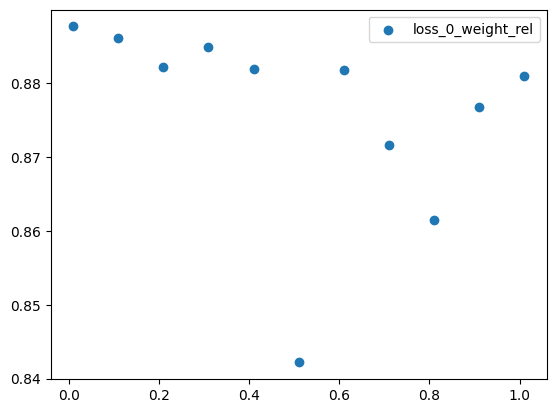

In [72]:
import matplotlib.pyplot as plt


df_weights = df.groupby(['loss_0_weight_rel'])['best_surface_dice'].max().reset_index()
plt.scatter(df_weights['loss_0_weight_rel'], df_weights['best_surface_dice'], label='loss_0_weight_rel')
# plt.scatter(df['loss_0_weight_rel'], df['best_surface_dice'], label='loss_0_weight_rel')

# plt.ylim(0.85, 0.9)
plt.legend()

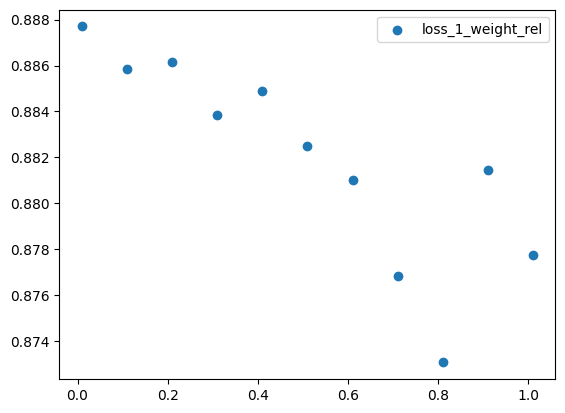

In [73]:
import matplotlib.pyplot as plt


df_weights = df.groupby(['loss_1_weight_rel'])['best_surface_dice'].max().reset_index()
plt.scatter(df_weights['loss_1_weight_rel'], df_weights['best_surface_dice'], label='loss_1_weight_rel')
# plt.scatter(df['loss_1_weight_rel'], df['best_surface_dice'], label='loss_1_weight_rel')


# plt.ylim(0.85, 0.9)

plt.legend()

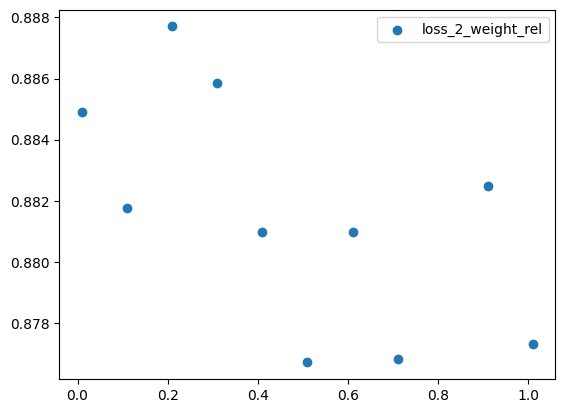

In [74]:
import matplotlib.pyplot as plt


df_weights = df.groupby(['loss_2_weight_rel'])['best_surface_dice'].max().reset_index()
plt.scatter(df_weights['loss_2_weight_rel'], df_weights['best_surface_dice'], label='loss_2_weight_rel')
# plt.scatter(df['loss_2_weight_rel'], df['best_surface_dice'], label='loss_2_weight_rel')
# plt.ylim(0.85, 0.9)

plt.legend()

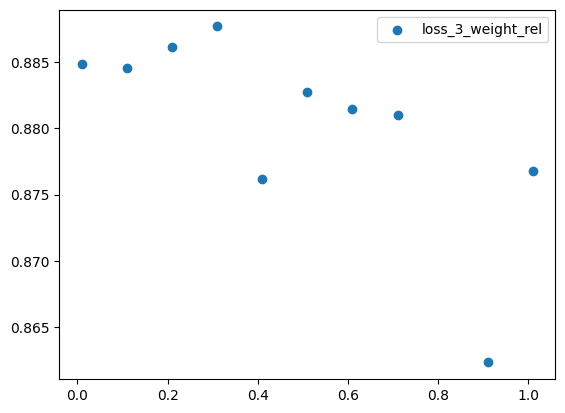

In [75]:
import matplotlib.pyplot as plt


df_weights = df.groupby(['loss_3_weight_rel'])['best_surface_dice'].max().reset_index()
plt.scatter(df_weights['loss_3_weight_rel'], df_weights['best_surface_dice'], label='loss_3_weight_rel')

# plt.scatter(df['loss_3_weight_rel'], df['best_surface_dice'], label='loss_3_weight_rel')
# plt.ylim(0.85, 0.9)

plt.legend()

# Augm prob

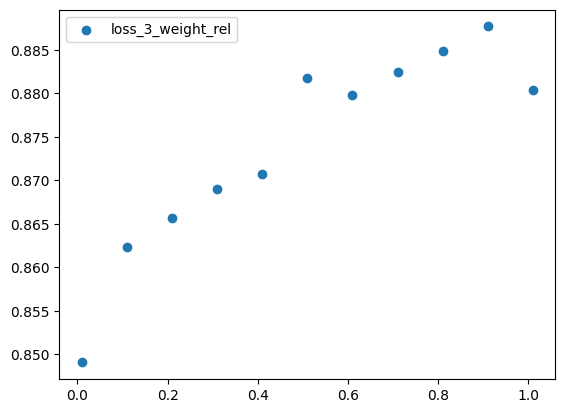

In [76]:
df['p_any_augm'] = df['augmentation_augmenter_kwargs_p_any_augm']
# round to 0.10
# df['p_any_augm'] = df['p_any_augm'] // 0.10 * 0.10
df_weights = df.groupby(['p_any_augm'])['best_surface_dice'].max().reset_index()

plt.scatter(df_weights['p_any_augm'], df_weights['best_surface_dice'], label='loss_3_weight_rel')
plt.legend()

# Batch augms

In [77]:
for col in df.columns:
    if '_prob' in col:
        print(col)

batch_transform_kwargs_mixup_prob
batch_transform_kwargs_cutmix_prob


Text(0.5, 1.0, 'mixup_prob')

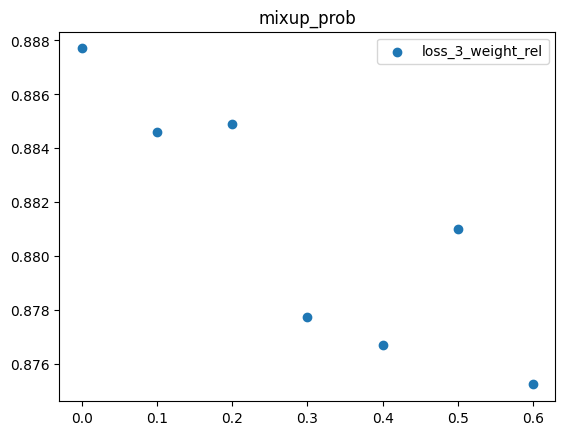

In [78]:
df['mixup_prob'] = df['batch_transform_kwargs_mixup_prob']
df['cutmix_prob'] = df['batch_transform_kwargs_cutmix_prob']

# round to 0.10
df['mixup_prob'] = df['mixup_prob'] // 0.10 * 0.10
df['cutmix_prob'] = df['cutmix_prob'] // 0.10 * 0.10

df_weights = df.groupby(['mixup_prob'])['best_surface_dice'].max().reset_index()
plt.scatter(df_weights['mixup_prob'], df_weights['best_surface_dice'], label='loss_3_weight_rel')
plt.legend()

plt.title('mixup_prob')

Text(0.5, 1.0, 'cutmix_prob')

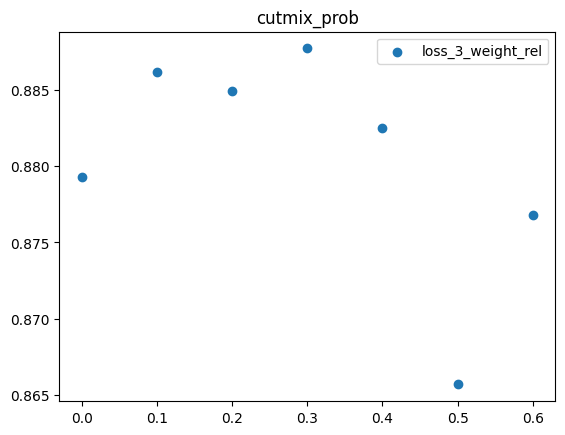

In [79]:
df_weights = df.groupby(['cutmix_prob'])['best_surface_dice'].max().reset_index()
plt.scatter(df_weights['cutmix_prob'], df_weights['best_surface_dice'], label='loss_3_weight_rel')
plt.legend()

plt.title('cutmix_prob')

# Best params

In [80]:
indx = df['best_surface_dice'].argmax()
best_row = df.iloc[indx]
# print in nice format
for key, value in best_row.items():
    print(f'{key}: {value}')

loss_0_type: BCELoss
loss_0_weight: 0.01
loss_1_type: MccLoss
loss_1_weight: 0.01
loss_2_type: DiceLoss
loss_2_kwargs_smooth: 0.0001
loss_2_weight: 0.21
loss_3_type: FocalLoss
loss_3_kwargs_gamma: 2
loss_3_weight: 0.31000000000000005
task_kwargs_ema_momentum: 0.00025
task_kwargs_eval_threshold: 0.2
task_kwargs_compute_crude_metrics: False
model_type: SMPModel
model_kwargs_classes: 1
model_kwargs_version: Unet
model_kwargs_in_channels: 1
model_kwargs_encoder_name: resnet18
model_kwargs_encoder_weights: imagenet
dataset_kwargs_load_ann: True
dataset_kwargs_crop_size: 512
dataset_kwargs_to_float32: True
dataset_kwargs_channel_end: None
dataset_kwargs_seg_fill_val: 0
dataset_kwargs_channel_start: 0
dataset_kwargs_crop_size_range_0: 400
dataset_kwargs_crop_size_range_1: 600
dataset_kwargs_n_take_channels: 1
dataset_kwargs_output_crop_size: None
dataset_kwargs_sample_with_mask: False
dataset_kwargs_p_crop_size_noise: 0.25
dataset_kwargs_reduce_zero_label: False
dataset_kwargs_assert_label_ex